In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

data = load_iris()
X = data.data
df = pd.DataFrame(X, columns=data.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
dbscan = DBSCAN(eps=0.6, min_samples=5)   
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters found: 2
Number of noise points: 26


In [15]:
df['Cluster'] = labels

if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.403


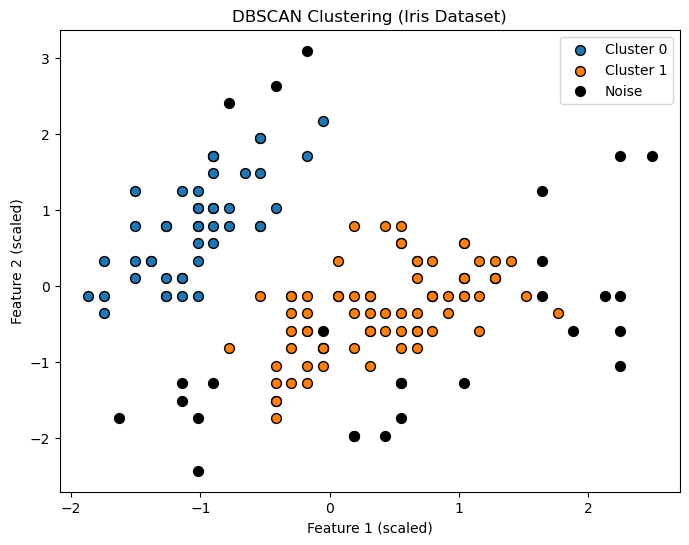

In [16]:
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = [plt.cm.tab10(each) for each in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = (0, 0, 0, 1)
        label_name = "Noise"
    else:
        label_name = f"Cluster {k}"
    class_member_mask = (labels == k)
    plt.scatter(X_scaled[class_member_mask, 0],
                X_scaled[class_member_mask, 1],
                color=col,
                label=label_name,
                edgecolor='k',
                s=50)

plt.title("DBSCAN Clustering (Iris Dataset)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()